### Name : Sheeba Masalin

In [1]:
import pandas as pd

In [19]:
movie=pd.read_csv("movies.csv")
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [20]:
tag=pd.read_csv("tags.csv")
tag.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [21]:
link=pd.read_csv("links.csv")
link.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [22]:
rating=pd.read_csv("ratings.csv")
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
print(movie.shape)

(9742, 3)


In [7]:
print(rating.shape)

(100836, 4)


In [9]:
unique_users = rating['userId'].nunique()
print("Number of unique userId:", unique_users)


Number of unique userId: 610


In [11]:
movie_ratings_count = rating.groupby('movieId')['rating'].count()
max_rated_movie_id = movie_ratings_count.idxmax()
movies = pd.read_csv("movies.csv")
max_rated_movie = movies[movies['movieId'] == max_rated_movie_id]
print("Movie with the maximum number of user ratings:")
print(max_rated_movie[['title', 'genres']])

Movie with the maximum number of user ratings:
                   title                    genres
314  Forrest Gump (1994)  Comedy|Drama|Romance|War


In [15]:
matrix_movie_id = 2571
matrix_tags = tag[(tag['movieId'] == matrix_movie_id) & (tag['tag'].notnull())]
unique_tags = matrix_tags['tag'].unique()
print("Tags submitted for 'Matrix, The (1999)':")
print(unique_tags)

Tags submitted for 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [16]:
ratings_df = pd.read_csv(ratings_file_path)
movies_df = pd.read_csv(movies_file_path)
terminator_movie = movies_df[movies_df['title'] == 'Terminator 2: Judgment Day (1991)']
merged_df = pd.merge(ratings_df, terminator_movie, on='movieId')
average_rating = merged_df['rating'].mean()
print("Average user rating for 'Terminator 2: Judgment Day (1991)':", average_rating)

Average user rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143


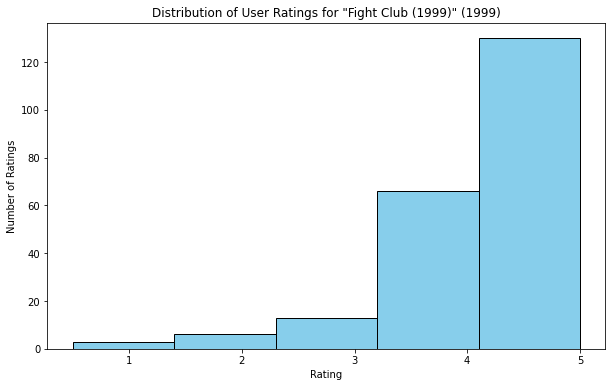

In [17]:
movie_title = "Fight Club (1999)"
movie_id = movies[movies['title'] == movie_title]['movieId'].values[0]
movie_ratings = ratings[ratings['movieId'] == movie_id]
plt.figure(figsize=(10, 6))
plt.hist(movie_ratings['rating'], bins=5, edgecolor='black', color='skyblue')
plt.title(f'Distribution of User Ratings for "{movie_title}" (1999)')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

In [18]:
average_ratings = ratings.groupby('movieId')['rating'].mean()
movies_with_avg_ratings = movies.join(average_ratings, on='movieId')
selected_movies = ["Godfather, The (1972)", "Shawshank Redemption, The (1994)", "Jumanji (1995)", "Wolf of Wall Street, The (2013)"]
selected_movies_info = movies_with_avg_ratings[movies_with_avg_ratings['title'].isin(selected_movies)]
most_popular_selected_movie = selected_movies_info[selected_movies_info['rating'] == selected_movies_info['rating'].max()]
print("Most popular movie based on average user ratings among the selected ones:")
print(most_popular_selected_movie[['title', 'genres', 'rating']])

Most popular movie based on average user ratings among the selected ones:
                                title       genres    rating
277  Shawshank Redemption, The (1994)  Crime|Drama  4.429022


In [24]:
movies_df = pd.read_csv(movies_file_path)
grouped_ratings = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')
filtered_movies = merged_df[merged_df['count'] > 50]
sorted_movies = filtered_movies.sort_values(by='count', ascending=False)
top_5_movies = sorted_movies.head(5)
print("Top 5 popular movies based on the number of user ratings:")
print(top_5_movies['title'])

Top 5 popular movies based on the number of user ratings:
314                  Forrest Gump (1994)
277     Shawshank Redemption, The (1994)
257                  Pulp Fiction (1994)
510     Silence of the Lambs, The (1991)
1938                  Matrix, The (1999)
Name: title, dtype: object


In [25]:
grouped_ratings = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')
filtered_movies = merged_df[merged_df['count'] > 50]
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='count', ascending=False)
third_most_popular_sci_fi = sorted_sci_fi_movies.iloc[2]
print("Third most popular Sci-Fi movie based on the number of user ratings:")
print(third_most_popular_sci_fi['title'])

Third most popular Sci-Fi movie based on the number of user ratings:
Jurassic Park (1993)


In [26]:
average_ratings = ratings_df.groupby('movieId')['rating'].mean().reset_index()
highest_rated_movie_id = average_ratings.loc[average_ratings['rating'].idxmax(), 'movieId']
print("MovieId of the movie with the highest average user rating:", highest_rated_movie_id)

MovieId of the movie with the highest average user rating: 53


In [27]:
grouped_ratings = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')
sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi')]
highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['mean'].idxmax(), 'movieId']
print("MovieId of the Sci-Fi movie with the highest average user rating (IMDb):", highest_rated_sci_fi_movie)

MovieId of the Sci-Fi movie with the highest average user rating (IMDb): 3687
